In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
r
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [107]:
df=pd.read_csv('C:/Users/Sachin Mishra/Desktop/results.csv')
df.columns

Index(['date', 'Team_1', 'Team_2', 'Winner', 'Margin', 'Ground'], dtype='object')

In [3]:
df=df.drop(['date','Margin', 'Ground'], axis=1)
df.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [4]:
df = df.reset_index(drop=True)
df.loc[df.Winner == df.Team_1,'winning_team']=1
df.loc[df.Winner == df.Team_2, 'winning_team']=2
df = df.drop(['winning_team'], axis=1)

df.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [5]:
final = pd.get_dummies(df, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
final.head()


,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_Hong Kong,Team_1_India,Team_1_Ireland,Team_1_Kenya,...,Team_2_Netherlands,Team_2_New Zealand,Team_2_P.N.G.,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)
rf.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
fixtures = pd.read_csv('C:/Users/Sachin Mishra/Desktop/fixtures.csv')

In [9]:
matches=[]

In [10]:
for index, row in fixtures.iterrows():
    matches.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})

In [11]:
matches=pd.DataFrame(matches)
backup_pred_set = matches

In [12]:
backup_pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,West Indies,Pakistan,None
2,New Zealand,Sri Lanka,None
3,Afghanistan,Australia,None
4,South Africa,Bangladesh,None


In [13]:
matches=pd.get_dummies(matches, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

In [14]:
matches.head()

,winning_team,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_1_Sri Lanka,...,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_To be announced,Team_2_West Indies
0,None,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,None,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,None,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,None,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
matches=matches.drop(['winning_team'], axis=1)

In [16]:
pred_set=matches

In [17]:
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

In [18]:
pred_set = pred_set.drop(['Winner'], axis=1)


In [19]:
predictions = rf.predict(pred_set)
print(predictions)

['England' 'Pakistan' 'New Zealand' 'Australia' 'South Africa' 'England'
 'Sri Lanka' 'South Africa' 'Bangladesh' 'Australia' 'Pakistan' 'England'
 'Afghanistan' 'India' 'South Africa' 'Sri Lanka' 'Australia' 'India'
 'England' 'Australia' 'South Africa' 'India' 'West Indies' 'England'
 'South Africa' 'Australia' 'England' 'India' 'West Indies' 'South Africa'
 'Bangladesh' 'England' 'New Zealand' 'India' 'Sri Lanka' 'Pakistan'
 'Australia' 'England' 'Sri Lanka' 'India' 'England' 'Afghanistan'
 'Pakistan' 'India' 'South Africa' 'Ireland' 'Ireland' 'Ireland']


In [20]:
eng=np.count_nonzero(predictions == 'England')
pak=np.count_nonzero(predictions == 'Pakistan')

ind=np.count_nonzero(predictions == 'India')
aus=np.count_nonzero(predictions == 'Australia')
sa=np.count_nonzero(predictions == 'South Africa')
ban=np.count_nonzero(predictions == 'Bangladesh')
sl=np.count_nonzero(predictions == 'Sri Lanka')
irel=np.count_nonzero(predictions == 'Ireland')
nz=np.count_nonzero(predictions == 'New Zealand')
wi=np.count_nonzero(predictions == 'West Indies')
fin=[pak,ind,nz,aus,sa,ban,sl,wi,irel,eng]
name=["pak","ind","nz","aus","sa","ban","sl","wi","irel","eng"]
print(fin)

[4, 7, 2, 6, 7, 2, 4, 2, 3, 9]


In [21]:
for i in range(len(fin)): 
      
    # Find the minimum element in remaining  
    # unsorted array 
    min_idx = i 
    for j in range(i+1, len(fin)): 
        if fin[min_idx] < fin[j]: 
            min_idx = j 
              
    # Swap the found minimum element with  
    # the first element    
    name[i],name[min_idx]=name[min_idx],name[i]
    fin[i], fin[min_idx] = fin[min_idx], fin[i] 

In [22]:
print("RANK        TEAM        POINTS")
for x in range(len(name)):
    print(x+1,end="        ")
    print(name[x], end="        ")
  
    print(fin[x]*2,end="         ")
    print("\n")

RANK        TEAM        POINTS
1        eng        18         

2        ind        14         

3        sa        14         

4        aus        12         

5        sl        8         

6        pak        8         

7        irel        6         

8        wi        4         

9        nz        4         

10        ban        4         



In [23]:
# Semi Finalists are ENGLAND,INDIA,SOUTH AFRICA and AUSTRALIA.
#SF1=ENG vs SA
#SF2=IND vs AUS

In [99]:
X_train.columns

Index(['Team_1_Afghanistan', 'Team_1_Australia', 'Team_1_Bangladesh',
       'Team_1_Canada', 'Team_1_England', 'Team_1_Hong Kong', 'Team_1_India',
       'Team_1_Ireland', 'Team_1_Kenya', 'Team_1_Netherlands',
       'Team_1_New Zealand', 'Team_1_P.N.G.', 'Team_1_Pakistan',
       'Team_1_Scotland', 'Team_1_South Africa', 'Team_1_Sri Lanka',
       'Team_1_U.A.E.', 'Team_1_West Indies', 'Team_1_Zimbabwe',
       'Team_2_Afghanistan', 'Team_2_Australia', 'Team_2_Bangladesh',
       'Team_2_Canada', 'Team_2_England', 'Team_2_Hong Kong', 'Team_2_India',
       'Team_2_Ireland', 'Team_2_Kenya', 'Team_2_Netherlands',
       'Team_2_New Zealand', 'Team_2_P.N.G.', 'Team_2_Pakistan',
       'Team_2_Scotland', 'Team_2_South Africa', 'Team_2_Sri Lanka',
       'Team_2_U.A.E.', 'Team_2_West Indies', 'Team_2_Zimbabwe'],
      dtype='object')

In [95]:
sf1=[[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00,00,0,0,0,0,0,0,0,00,00,0]]
i=0
chk=0
for x in X_train.columns:
    if(x=='Team_1_England' or x=='Team_2_South Africa'):
        sf1[0][i]=1
        if(x=='Team_1_India'):
            chk=i
    i=i+1

ressf1=rf.predict(sf1)
print(ressf1)




['England']


In [96]:
sf2=[[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,00,0,0,0,00,0,0,0,0,0,0]]
rsf2=rf.predict(sf2)
print(rsf2)

['India']


In [97]:
print("FINALIS OF 2019 world cup are INDIA & ENGLAND")

FINALIS OF 2019 world cup are INDIA & ENGLAND


In [101]:
findataset=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00,00,0,0,0,0,0,0,0,00,00,0]]
i=0
chk=0
for x in X_train.columns:
    if(x=='Team_1_England' or x=='Team_2_India'):
        findataset[0][i]=1
        
    i=i+1

ressf=rf.predict(findataset)
print("The world Cup 2019 winner is")
print(ressf)


The world Cup 2019 winner is
['England']


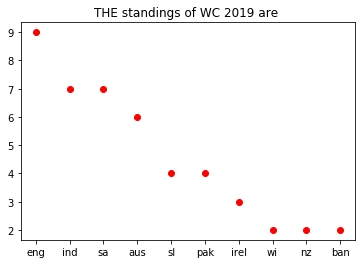

In [105]:
plt.plot(name,fin,'ro')
plt.title("THE standings of WC 2019 are ")
plt.show()
